In [2]:
pip install numpy


In [3]:
import numpy as np

In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

In [12]:
np.random.seed(42)

In [25]:
apartments=[f'apy_{i}'for i in range(1,21)]

In [26]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [31]:
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity-usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}


In [32]:
df=pd.DataFrame(data)

In [33]:
df["Electricity_usage"]

,Date,Apartment,Electricity-usage
0,2025-07-01,apy_1,16.045688
1,2025-07-02,apy_1,13.376332
2,2025-07-03,apy_1,25.772974
3,2025-07-04,apy_1,19.010361
4,2025-07-05,apy_1,19.098314
...,...,...,...
595,2025-07-26,apy_20,21.157941
596,2025-07-27,apy_20,26.026970
597,2025-07-28,apy_20,23.357351
598,2025-07-29,apy_20,25.791717


In [34]:
print(df.describe())

                      Date  Electricity-usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.983461
min    2025-07-01 00:00:00           5.480097
25%    2025-07-08 00:00:00          16.882498
50%    2025-07-15 12:00:00          19.911755
75%    2025-07-23 00:00:00          23.305553
max    2025-07-30 00:00:00          34.174913
std                    NaN           4.969801


In [35]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity-usage           float64
dtype: object


In [41]:
usage_per_apartment= df.groupby("Apartment")["Electricity-usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Apartment
apy_12    650.395096
apy_19    642.094261
apy_16    641.408106
apy_6     623.633502
apy_14    612.688975
apy_10    611.296694
apy_18    610.619301
apy_9     608.896269
apy_4     607.510513
apy_7     597.236400
apy_20    589.765891
apy_13    587.893341
apy_15    587.473606
apy_5     586.813236
apy_1     586.293642
apy_3     584.550780
apy_11    569.742822
apy_8     567.340216
apy_2     565.688163
apy_17    558.735742
Name: Electricity-usage, dtype: float64


In [43]:
daily_avg=df.groupby("Date")["Electricity-usage"].mean()
print (daily_avg.head())

Date
2025-07-01    19.138760
2025-07-02    16.798970
2025-07-03    21.313118
2025-07-04    20.008020
2025-07-05    20.719884
Name: Electricity-usage, dtype: float64


In [44]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

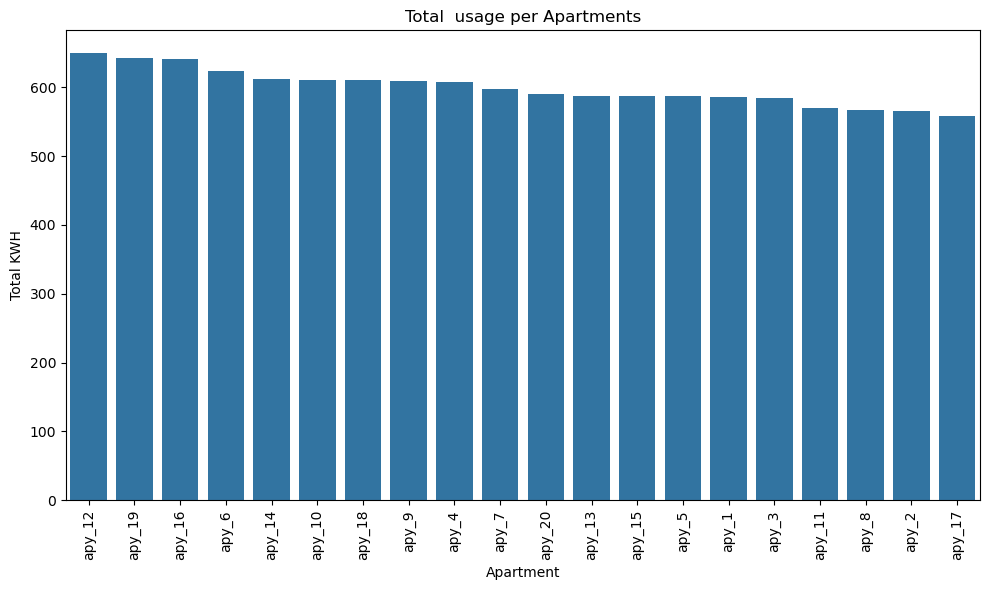

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total  usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

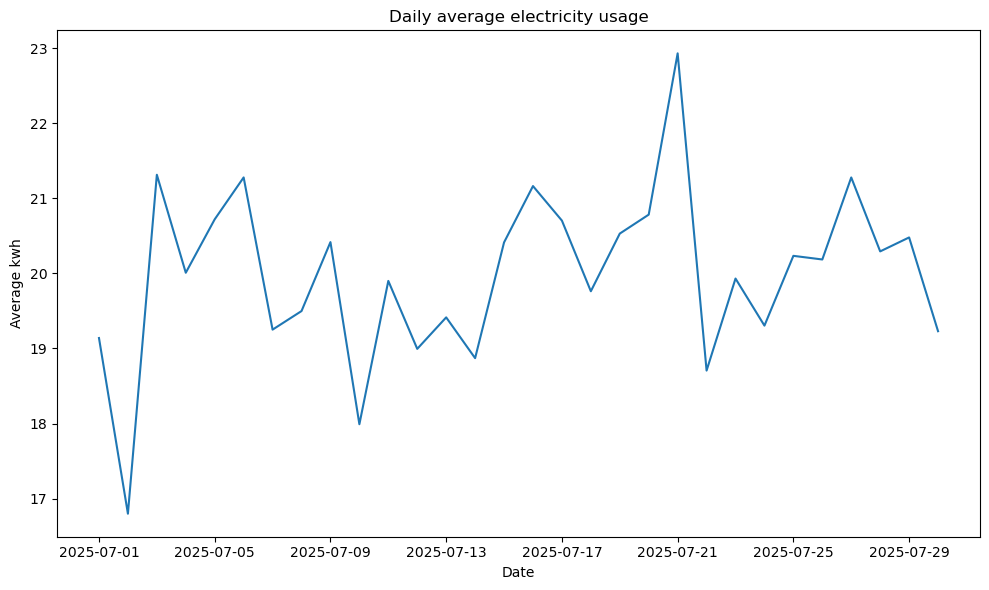

In [51]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Date")
plt.ylabel("Average kwh")
plt.tight_layout()
plt.show()

In [53]:
threshold= df["Electricity-usage"].mean()+2 *df["Electricity-usage"].std()
df["High_usage_flag"]=df["Electricity-usage"] > threshold
print(df[df["High_usage_flag"]== True].head())

          Date Apartment  Electricity-usage  High_usage_flag
95  2025-07-06     apy_4          30.968937             True
162 2025-07-13     apy_6          31.975993             True
171 2025-07-22     apy_6          30.911355             True
245 2025-07-06     apy_9          34.174913             True
247 2025-07-08     apy_9          33.547593             True
